Step 2:

In [ ]:
!pip install scikit-learn
import pandas as pd
data=pd.read_csv("ratings.csv")
print("Successfully installed dataset.")


In [ ]:
rows_to_show = 10   # <-- Try changing this number to see more rows of data
data.rating.head(rows_to_show)  # <-- Try changing "ratings" to "movies", "tags", or "links" to see the

,rating
0,4.0
1,1.0
2,2.0
3,5.0
4,5.0
5,2.0
6,1.0
7,5.0
8,3.0
9,5.0


In [ ]:
import pandas as pd
movies=pd.read_csv("movies.csv")
joined_data=pd.merge(data[["movieId","rating"]],movies[["movieId","genres","title"]],on="movieId",how="left")
joined_data.head(rows_to_show)

,movieId,rating,genres,title
0,17.0,4.0,Drama|Romance,Sense and Sensibility (1995)
1,25.0,1.0,Drama|Romance,Leaving Las Vegas (1995)
2,29.0,2.0,Adventure|Drama|Fantasy|Mystery|Sci-Fi,"City of Lost Children, The (Cité des enfants p..."
3,30.0,5.0,Crime|Drama,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
4,32.0,5.0,Mystery|Sci-Fi|Thriller,Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
5,34.0,2.0,Children|Drama,Babe (1995)
6,36.0,1.0,Crime|Drama,Dead Man Walking (1995)
7,80.0,5.0,Children|Drama,"White Balloon, The (Badkonake sefid) (1995)"
8,110.0,3.0,Action|Drama|War,Braveheart (1995)
9,111.0,5.0,Crime|Drama|Thriller,Taxi Driver (1976)


Step 3:

In [ ]:
average_ratings=data.groupby(["movieId"])["rating"].mean()
sorted_avg_ratings=average_ratings.sort_values(ascending=False)
joined_data=pd.merge(sorted_avg_ratings,movies[["movieId","genres","title"]],left_index=True,right_on="movieId",how="left")
joined_data=joined_data[["rating","genres","title"]]
joined_data.head(rows_to_show)

,rating,genres,title
42518,5.0,Documentary,Terra (2015)
59993,5.0,Comedy,Seven Dinners (2019)
59992,5.0,Drama,The Red Collar (2018)
84311,5.0,Adventure|Drama,Messidor (1979)
74557,5.0,Comedy|Romance,Love Is in the Air (2005)
74560,5.0,Comedy,Selfie (2019)
50587,5.0,Drama,Oro (2017)
72647,5.0,Drama|Romance,Your Name Engraved Herein (2020)
6433,5.0,Crime|Drama|Thriller,On the Run (2002)
63137,5.0,Comedy|Documentary,Windy City Heat (2003)


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('genres').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['rating']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'rating'}, axis=1)
              .sort_values('rating', ascending=True))
  xs = counted['rating']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('rating', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('genres')):
  _plot_series(series, series_name, i)
  fig.legend(title='genres', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('rating')
_ = plt.ylabel('count()')

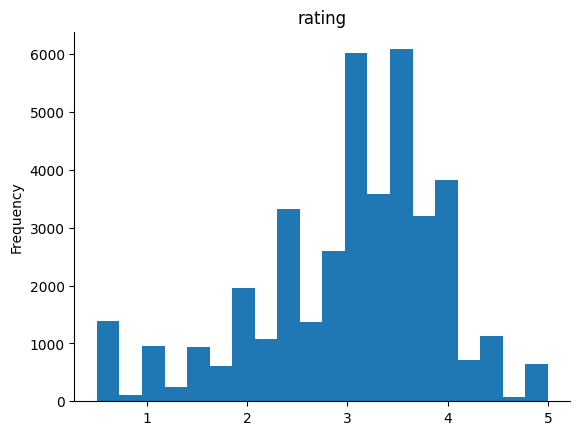

In [ ]:
# @title rating

from matplotlib import pyplot as plt
joined_data['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
average_ratings = data.groupby('movieId')['rating'] \
       .agg(count='size', rating='mean') \
       .reset_index()

sorted_avg_ratings = average_ratings.sort_values(by="rating", ascending=False
joined_data = sorted_avg_ratings.merge(movies[['movieId', 'genres', 'title']], on='movieId', how='left')
joined_data = joined_data[['rating', 'genres', 'title']]


print("RECOMMENDED FOR ANYBODY:")
joined_data.head(rows_to_show)

RECOMMENDED FOR ANYBODY:


,rating,genres,title
0,5.0,Documentary,Terra (2015)
1,5.0,Comedy,Seven Dinners (2019)
2,5.0,Drama,The Red Collar (2018)
3,5.0,Adventure|Drama,Messidor (1979)
4,5.0,Comedy|Romance,Love Is in the Air (2005)
5,5.0,Comedy,Selfie (2019)
6,5.0,Drama,Oro (2017)
7,5.0,Drama|Romance,Your Name Engraved Herein (2020)
8,5.0,Crime|Drama|Thriller,On the Run (2002)
9,5.0,Comedy|Documentary,Windy City Heat (2003)


from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('genres').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['rating']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'rating'}, axis=1)
              .sort_values('rating', ascending=True))
  xs = counted['rating']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('rating', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('genres')):
  _plot_series(series, series_name, i)
  fig.legend(title='genres', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('rating')
_ = plt.ylabel('count()')

In [ ]:
average_ratings = data.groupby('movieId')['rating'] \
       .agg(count='size', rating='mean') \
       .reset_index()

sorted_avg_ratings = average_ratings.sort_values(by="rating", ascending=False)
joined_data = sorted_avg_ratings.merge(movies[['movieId', 'genres', 'title']], on='movieId', how='left') # Ensure 'movies' DataFrame is available
joined_data = joined_data[['rating', 'genres', 'title']] # Select desired columns

print("RECOMMENDED FOR ANYBODY:")
joined_data.head(rows_to_show)

RECOMMENDED FOR ANYBODY:


,rating,genres,title
0,5.0,Documentary,Terra (2015)
1,5.0,Comedy,Seven Dinners (2019)
2,5.0,Drama,The Red Collar (2018)
3,5.0,Adventure|Drama,Messidor (1979)
4,5.0,Comedy|Romance,Love Is in the Air (2005)
5,5.0,Comedy,Selfie (2019)
6,5.0,Drama,Oro (2017)
7,5.0,Drama|Romance,Your Name Engraved Herein (2020)
8,5.0,Crime|Drama|Thriller,On the Run (2002)
9,5.0,Comedy|Documentary,Windy City Heat (2003)


Step 4:

In [ ]:
minimum_to_include = 20 #<-- You can try changing this minimum to include movies rated by fewer or more people

# Access the 'rating' column directly using data['rating'] instead of data.ratings
average_ratings = data.groupby('movieId')['rating'].mean()
rating_counts = data.groupby('movieId')['rating'].count()

# Filter out movies with less than minimum_to_include ratings
average_ratings = average_ratings[rating_counts >= minimum_to_include]

# Sort by average rating
sorted_avg_ratings = average_ratings.sort_values(ascending=False)

# Merge with movies dataframe to get genres and title
joined_data = pd.merge(sorted_avg_ratings.reset_index(), movies[['movieId', 'genres', 'title']], on='movieId', how='left')

# Select desired columns
joined_data = joined_data[['rating', 'genres', 'title']]

print("RECOMMENDED FOR ANYBODY:")
joined_data.head(rows_to_show)

RECOMMENDED FOR ANYBODY:


,rating,genres,title
0,4.488095,Drama,Twelve Angry Men (1954)
1,4.449367,Documentary,Planet Earth II (2016)
2,4.430894,Documentary,Planet Earth (2006)
3,4.416667,Comedy,George Carlin: You Are All Diseased (1999)
4,4.414634,Action|Drama|War,Band of Brothers (2001)
5,4.411470,Crime|Drama,"Shawshank Redemption, The (1994)"
6,4.367470,Drama|Mystery,Twin Peaks (1989)
7,4.363636,(no genres listed),Black Mirror
8,4.339506,Action|Adventure|Animation|Sci-Fi,Spider-Man: Across the Spider-Verse (2023)
9,4.331081,Comedy|Drama,Parasite (2019)


These movies are more commonly known and we can trust that they're more popularly recommended. But these movies span a bunch of genres, so we can try narrowing the list down a bit more.

 I like Action movies and moni like adventure movies. So in addition to filtering by the number of ratings, let's also filter by a particular genre. We'll run the recommendations for an action movie fan, then for a adventure movie fan.

In [ ]:
# Step 1: Get average ratings per item
# Correct column access: data['rating'] instead of data.ratings
average_ratings = data.groupby('movieId')['rating'].mean()

# Step 2: Get rating counts per item
# Correct column access: data['rating'] instead of data.ratings
rating_counts = data.groupby('movieId')['rating'].count()

# Step 3: Filter items with enough ratings
average_ratings = average_ratings.loc[rating_counts > minimum_to_include]

# Step 4: Join genres to average ratings
average_ratings = average_ratings.to_frame()  # Convert Series to DataFrame to join
# Use movies DataFrame instead of data.movies and join on 'movieId'
average_ratings = pd.merge(average_ratings, movies[['movieId', 'genres']], on='movieId', how='left')

# Step 5: Filter for Action genre
average_ratings = average_ratings[average_ratings['genres'].str.contains('Action', na=False)]

# Step 6: Sort by rating
sorted_avg_ratings = average_ratings.sort_values(by='rating', ascending=False)

# Step 7: Join titles
# Use movies DataFrame instead of data.movies and join on 'movieId'
joined_data = pd.merge(sorted_avg_ratings, movies[['movieId', 'title']], on='movieId', how='left')

# Step 8: Select relevant columns only
joined_data = joined_data[['title', 'genres', 'rating']]

# Step 9: Show results
print("RECOMMENDED FOR AN ACTION MOVIE FAN:")
print(joined_data.head(rows_to_show))

RECOMMENDED FOR AN ACTION MOVIE FAN:
                                         title  \
0                      Band of Brothers (2001)   
1   Spider-Man: Across the Spider-Verse (2023)   
2             Knockin' on Heaven's Door (1997)   
3    Kill Bill: The Whole Bloody Affair (2011)   
4                            Fight Club (1999)   
5  Seven Samurai (Shichinin no samurai) (1954)   
6                       Attack On Titan (2013)   
7     Spider-Man: Into the Spider-Verse (2018)   
8                               Yojimbo (1961)   
9                    North by Northwest (1959)   

                                      genres    rating  
0                           Action|Drama|War  4.414634  
1          Action|Adventure|Animation|Sci-Fi  4.339506  
2                  Action|Comedy|Crime|Drama  4.307143  
3                               Action|Crime  4.259259  
4                Action|Crime|Drama|Thriller  4.243444  
5                     Action|Adventure|Drama  4.241693  
6  Action|Adv

In [ ]:
# Calculate average ratings and rating counts
average_ratings = data.groupby('movieId')['rating'].mean()  # Changed 'item' to 'movieId' and group data by movieId and THEN access the rating
rating_counts = data.groupby('movieId')['rating'].count()  # Changed 'item' to 'movieId' and group data by movieId and THEN access the rating

# Filter by minimum number of ratings
average_ratings = average_ratings.loc[rating_counts > minimum_to_include]

# Join genres to average ratings
average_ratings = pd.merge(average_ratings.reset_index(), movies[['movieId', 'genres']], on='movieId', how='left') # Join using movieId and movies DataFrame

# Filter for Adventure genre
average_ratings = average_ratings.loc[average_ratings['genres'].str.contains('Adventure', na=False)]

# Sort by rating
sorted_avg_ratings = average_ratings.sort_values(by="rating", ascending=False)

# Join movie titles
joined_data = pd.merge(sorted_avg_ratings, movies[['movieId', 'title']], on='movieId', how='left')  # Join using movieId and movies DataFrame

# Select relevant columns
joined_data = joined_data[['title', 'genres', 'rating']]

# Print recommendations
print("RECOMMENDED FOR AN ADVENTURE MOVIE FAN:")
print(joined_data.head(rows_to_show))

RECOMMENDED FOR AN ADVENTURE MOVIE FAN:
                                               title  \
0         Spider-Man: Across the Spider-Verse (2023)   
1                      Embrace of the Serpent (2016)   
2        Seven Samurai (Shichinin no samurai) (1954)   
3                             Attack On Titan (2013)   
4  Spirited Away (Sen to Chihiro no kamikakushi) ...   
5           Spider-Man: Into the Spider-Verse (2018)   
6                                     Yojimbo (1961)   
7                          North by Northwest (1959)   
8                City of God (Cidade de Deus) (2002)   
9  Good, the Bad and the Ugly, The (Buono, il bru...   

                                      genres    rating  
0          Action|Adventure|Animation|Sci-Fi  4.339506  
1                            Adventure|Drama  4.321429  
2                     Action|Adventure|Drama  4.241693  
3  Action|Adventure|Animation|Fantasy|Sci-Fi  4.239130  
4                Adventure|Animation|Fantasy  4.226002  
5

There's actually one movie that's on both of these lists: Spider-Man: Across the Spider-Verse. But we doesn't want to rewatch.

In [ ]:
import csv

sree_rating_dict = {}
moni_rating_dict = {}

# Update the file path if necessary
sree_ratings_path = "./sree-movies-ratings.csv"  # Assuming the file is in the current directory
moni_ratings_path = "./moni-movies-ratings.csv"  # Assuming the file is in the current directory


# Load Sree's ratings
try:
    with open(sree_ratings_path, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['ratings'] and 0 < float(row['ratings']) <= 5:
                sree_rating_dict[int(row['item'])] = float(row['ratings'])
except FileNotFoundError:
    print(f"Error: File not found at {sree_ratings_path}. Please check the file path.")

# Load Moni's ratings
try:
    with open(moni_ratings_path, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['ratings'] and 0 < float(row['ratings']) <= 5:
                moni_rating_dict[int(row['item'])] = float(row['ratings'])
except FileNotFoundError:
    print(f"Error: File not found at {moni_ratings_path}. Please check the file path.")


# ✅ Done! Now print to confirm
print("🎬 Rating dictionaries assembled!")
print(f"Sree's ratings: {sree_rating_dict}")
print(f"Moni's ratings: {moni_rating_dict}")


# Optional: Sanity check if both rated a specific movie, e.g., The Princess Bride (1197)
if 1197 in sree_rating_dict:
    print("Sree's rating for Spider-Man: Across the Spider-Verse  (2023):", sree_rating_dict[1197])

if 1197 in moni_rating_dict:
    print("Moni's rating for Spider-Man: Across the Spider-Verse  (2023):", moni_rating_dict[1197])

🎬 Rating dictionaries assembled!
Sree's ratings: {356: 4.0, 318: 4.5, 296: 4.0, 593: 3.0, 2571: 5.0, 260: 4.0, 480: 4.5, 110: 3.0, 589: 4.0, 527: 4.0, 2959: 4.5, 1: 4.0, 1196: 4.5, 2858: 2.5, 47: 4.0, 780: 3.5, 150: 3.5, 1198: 4.0, 4993: 4.0, 1210: 4.0, 858: 4.0, 5952: 4.0, 7153: 4.0, 588: 3.5, 608: 3.5, 2762: 4.0, 364: 4.0, 1270: 4.5, 3578: 3.0, 4306: 5.0, 1580: 4.5, 648: 4.0, 344: 3.5, 4226: 4.0, 367: 4.0, 6539: 3.0, 58559: 5.0, 595: 3.0, 1214: 3.5, 1036: 3.0, 79132: 5.0, 1197: 4.5, 1704: 4.0, 6377: 4.0, 1721: 3.0, 2628: 3.5, 1136: 4.0, 3793: 4.0, 4886: 4.5, 1240: 4.0, 6874: 4.0, 7361: 3.5, 8961: 4.5, 541: 4.5, 1097: 4.0, 5349: 3.0, 2683: 4.0, 2716: 3.5, 5445: 4.0, 7438: 4.0, 4878: 3.5, 924: 4.5, 2115: 4.0, 60069: 4.0, 5816: 3.5, 44191: 3.5, 72998: 3.5, 6365: 3.5, 5378: 3.5, 33493: 3.5, 109487: 5.0, 2985: 4.0, 4246: 2.5, 2671: 2.5, 2424: 2.5, 7293: 2.0, 79702: 4.0, 69757: 2.0, 31658: 4.5, 58998: 3.0, 8533: 1.0, 902: 2.5, 4446: 5.0, 6155: 1.0, 80549: 3.0}
Moni's ratings: {356: 4.5, 31

In [ ]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Assuming you have moni_rating_dict and sree_rating_dict from previous code
ratings = []
for user_id, rating_dict in [('sree', sree_rating_dict),('moni', moni_rating_dict)]:
    for item, rating in rating_dict.items():
        ratings.append({'user': user_id, 'item': item, 'rating': rating})

ratings_df = pd.DataFrame(ratings)

# Create user-item matrix
user_item_matrix = ratings_df.pivot_table(index='user', columns='item', values='rating').fillna(0)

# Fit KNN model, ensuring n_neighbors is within bounds
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=min(3, len(user_item_matrix)))
model_knn.fit(user_item_matrix)

print("✅ Set up a User-User algorithm using Scikit-learn!")

# Recommend movies for a given user (e.g., 'moni')
query_user = 'sree'

# Find nearest neighbors, ensuring n_neighbors is within bounds
distances, indices = model_knn.kneighbors([user_item_matrix.loc[query_user]], n_neighbors=min(3 + 1, len(user_item_matrix)))

# Get neighbors (excluding self)
neighbor_indices = indices.flatten()[1:]

print(f"👥 Nearest neighbors to {query_user}:")
for i in neighbor_indices:
    print("-", user_item_matrix.index[i])

# Simple recommendation logic
user_ratings = user_item_matrix.loc[query_user]
unrated_items = user_ratings[user_ratings == 0].index

recommend_scores = {}
for i in neighbor_indices:
    neighbor = user_item_matrix.index[i]
    neighbor_ratings = user_item_matrix.loc[neighbor]
    for item in unrated_items:
        if neighbor_ratings[item] > 0:
            recommend_scores[item] = recommend_scores.get(item, 0) + neighbor_ratings[item]

# Sort and show top N
num_recs = 10
top_recs = sorted(recommend_scores.items(), key=lambda x: x[1], reverse=True)[:num_recs]

print(f"\n🎯 Top {num_recs} recommendations for {query_user}:")
for item, score in top_recs:
    print(f"Movie ID {item} with estimated score {score:.2f}")

✅ Set up a User-User algorithm using Scikit-learn!
👥 Nearest neighbors to sree:
- moni

🎯 Top 10 recommendations for sree:
Movie ID 720 with estimated score 5.00
Movie ID 745 with estimated score 5.00
Movie ID 1148 with estimated score 5.00
Movie ID 1907 with estimated score 5.00
Movie ID 2005 with estimated score 5.00
Movie ID 2081 with estimated score 5.00
Movie ID 2144 with estimated score 5.00
Movie ID 2572 with estimated score 5.00
Movie ID 4308 with estimated score 5.00
Movie ID 4896 with estimated score 5.00


Now that the system has defined clusters, we can give it our personal ratings to get the top 10 recommended movies for me and for moni!

For each of us, the User-User algorithm will find a neighborhood of users similar to us based on their movie ratings. It will look at movies that these similar users have rated that we haven't seen yet. Based on their ratings, it will predict how we may rate that movie if we watched it. Finally, it will order these predictions and print them in descending order to give our "top 10."

In [ ]:
from surprise import Dataset, Reader, KNNBasic
import pandas as pd

# 1. Create list of all items
all_items = ratings_df['item'].unique()

# 2. Get the items moni hasn't rated yet
sree_rated = set(sree_rating_dict.keys())
unrated_items = [item for item in all_items if item not in sree_rated]

# 3. Predict ratings for unrated items
predictions = []
for item in unrated_items:
    pred = algo.predict(uid='sree', iid=item)
    predictions.append((item, pred.est))

# 4. Get top-N recommendations
num_recs = 10
top_preds = sorted(predictions, key=lambda x: x[1], reverse=True)[:num_recs]

# 5. Convert to DataFrame
top_df = pd.DataFrame(top_preds, columns=['item', 'predicted_rating'])

# 6. Merge with movie metadata if available
# Make sure you have a DataFrame `movies_df` that has 'item', 'title', and 'genres'
# For example:
# movies_df = pd.read_csv('movies.csv') # should contain item, title, genres columns

# joined_data = top_df.merge(movies_df, on='item')  # Uncomment this if you have metadata
# print("🎬 RECOMMENDED FOR MONI:")
# display(joined_data)

print("🎬 RECOMMENDED FOR SREE:")
print(top_df)


🎬 RECOMMENDED FOR SREE:
    item  predicted_rating
0   4896                 5
1  68954                 5
2  40815                 5
3   2081                 5
4  56367                 5
5  54001                 5
6  69844                 5
7   2005                 5
8   1148                 5
9   4308                 5


In [ ]:
from surprise import Dataset, Reader, KNNBasic
import pandas as pd

# 1. Create list of all items
all_items = ratings_df['item'].unique()

# 2. Get the items moni hasn't rated yet
moni_rated = set(moni_rating_dict.keys())
unrated_items = [item for item in all_items if item not in moni_rated]

# 3. Predict ratings for unrated items
predictions = []
for item in unrated_items:
    pred = algo.predict(uid='moni', iid=item)
    predictions.append((item, pred.est))

# 4. Get top-N recommendations
num_recs = 10
top_preds = sorted(predictions, key=lambda x: x[1], reverse=True)[:num_recs]

# 5. Convert to DataFrame
top_df = pd.DataFrame(top_preds, columns=['item', 'predicted_rating'])

# 6. Merge with movie metadata if available
# Make sure you have a DataFrame `movies_df` that has 'item', 'title', and 'genres'
# For example:
# movies_df = pd.read_csv('movies.csv') # should contain item, title, genres columns

# joined_data = top_df.merge(movies_df, on='item')  # Uncomment this if you have metadata
# print("🎬 RECOMMENDED FOR MONI:")
# display(joined_data)

print("🎬 RECOMMENDED FOR MONI:")
print(top_df)


🎬 RECOMMENDED FOR MONI:
    item  predicted_rating
0    480               4.5
1   1196               4.5
2   1210               4.0
3    858               4.0
4   1136               4.0
5   1240               4.0
6   6539               3.0
7   1721               3.0
8  80549               3.0


In [ ]:
combined_rating_dict = {}  # Initialize the dictionary with the correct name
for k in sree_rating_dict:
    if k in moni_rating_dict:
        combined_rating_dict.update({k: float((sree_rating_dict[k] + moni_rating_dict[k]) / 2)})
    else:
        combined_rating_dict.update({k: sree_rating_dict[k]})
for k in moni_rating_dict:
    if k not in combined_rating_dict:
        combined_rating_dict.update({k: moni_rating_dict[k]})

print("Combined ratings dictionary assembled!")
print("Sanity check:")

# Check if the movie ID 2023 exists in the combined_rating_dict before accessing it
if 2023 in combined_rating_dict:
    print("\tCombined rating for 2023 (Spider-Man: Across the Spider-Verse) is " + str(combined_rating_dict[2023]))
else:
    print("\tMovie ID 2023 (Spider-Man: Across the Spider-Verse) not found in combined ratings.")

Combined ratings dictionary assembled!
Sanity check:
	Movie ID 2023 (Spider-Man: Across the Spider-Verse) not found in combined ratings.


Step 5:

In [ ]:
!pip install scikit-learn
!pip install surprise
import csv
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from surprise import Dataset, Reader, KNNBasic

# --- LOAD RATING FILES ---
sree_rating_dict = {}
moni_rating_dict = {}

sree_ratings_path = "/content/sree-movies-ratings.csv"
moni_ratings_path = "/content/moni-movies-ratings.csv"

# Read Sree's ratings
with open(sree_ratings_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['ratings'] and 0 < float(row['ratings']) <= 5:
            sree_rating_dict[int(row['item'])] = float(row['ratings'])

# Read Moni's ratings
with open(moni_ratings_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['ratings'] and 0 < float(row['ratings']) <= 5:
            moni_rating_dict[int(row['item'])] = float(row['ratings'])

print("🎬 Loaded ratings!")
print(f"✅ Sree: {len(sree_rating_dict)} ratings")
print(f"✅ Moni: {len(moni_rating_dict)} ratings")

# --- COMBINE INTO DATAFRAME ---
ratings = []
for user_id, rating_dict in [('sree', sree_rating_dict), ('moni', moni_rating_dict)]:
    for item, rating in rating_dict.items():
        ratings.append({'user': user_id, 'item': item, 'rating': rating})

ratings_df = pd.DataFrame(ratings)

# --- SCIKIT-LEARN BASED USER-USER CF ---
user_item_matrix = ratings_df.pivot_table(index='user', columns='item', values='rating').fillna(0)
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=min(2, len(user_item_matrix)))
model_knn.fit(user_item_matrix)

query_user = 'sree'
distances, indices = model_knn.kneighbors([user_item_matrix.loc[query_user]], n_neighbors=2)
neighbor_indices = indices.flatten()[1:]

user_ratings = user_item_matrix.loc[query_user]
unrated_items = user_ratings[user_ratings == 0].index
recommend_scores = {}

for i in neighbor_indices:
    neighbor = user_item_matrix.index[i]
    neighbor_ratings = user_item_matrix.loc[neighbor]
    for item in unrated_items:
        if neighbor_ratings[item] > 0:
            recommend_scores[item] = recommend_scores.get(item, 0) + neighbor_ratings[item]

top_recs = sorted(recommend_scores.items(), key=lambda x: x[1], reverse=True)[:5]

print(f"\n📌 Top 5 Scikit-learn Recommendations for {query_user}:")
for item, score in top_recs:
    print(f"Movie ID {item} → estimated score: {score:.2f}")

# --- SURPRISE LIBRARY BASED USER-USER CF ---
reader = Reader(rating_scale=(1, 5))
data_surprise = Dataset.load_from_df(ratings_df[['user', 'item', 'rating']], reader)
trainset = data_surprise.build_full_trainset()

algo = KNNBasic()
algo.fit(trainset)

user_items = set(ratings_df[ratings_df['user'] == query_user]['item'])
all_items = set(ratings_df['item'])
unrated_items_surprise = list(all_items - user_items)

predictions = [algo.predict(query_user, iid) for iid in unrated_items_surprise]
top_preds = sorted(predictions, key=lambda x: x.est, reverse=True)[:5]

print(f"\n📌 Top 5 Surprise Recommendations for {query_user}:")
for pred in top_preds:
    print(f"Movie ID {pred.iid} → estimated score: {pred.est:.2f}")

🎬 Loaded ratings!
✅ Sree: 85 ratings
✅ Moni: 135 ratings

📌 Top 5 Scikit-learn Recommendations for sree:
Movie ID 720 → estimated score: 5.00
Movie ID 745 → estimated score: 5.00
Movie ID 1148 → estimated score: 5.00
Movie ID 1907 → estimated score: 5.00
Movie ID 2005 → estimated score: 5.00
Computing the msd similarity matrix...
Done computing similarity matrix.

📌 Top 5 Surprise Recommendations for sree:
Movie ID 2572 → estimated score: 5.00
Movie ID 7451 → estimated score: 5.00
Movie ID 4896 → estimated score: 5.00
Movie ID 2081 → estimated score: 5.00
Movie ID 81834 → estimated score: 5.00


In [ ]:
!pip install scikit-learn
!pip install surprise
import csv
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from surprise import Dataset, Reader, KNNBasic

# --- LOAD RATING FILES ---
sree_rating_dict = {}
moni_rating_dict = {}

sree_ratings_path = "/content/sree-movies-ratings.csv"
moni_ratings_path = "/content/moni-movies-ratings.csv"

# Read Sree's ratings
with open(sree_ratings_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['ratings'] and 0 < float(row['ratings']) <= 5:
            sree_rating_dict[int(row['item'])] = float(row['ratings'])

# Read Moni's ratings
with open(moni_ratings_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['ratings'] and 0 < float(row['ratings']) <= 5:
            moni_rating_dict[int(row['item'])] = float(row['ratings'])

print("🎬 Loaded ratings!")
print(f"✅ Sree: {len(sree_rating_dict)} ratings")
print(f"✅ Moni: {len(moni_rating_dict)} ratings")

# --- COMBINE INTO DATAFRAME ---
ratings = []
for user_id, rating_dict in [('sree', sree_rating_dict), ('moni', moni_rating_dict)]:
    for item, rating in rating_dict.items():
        ratings.append({'user': user_id, 'item': item, 'rating': rating})

ratings_df = pd.DataFrame(ratings)

# --- SCIKIT-LEARN BASED USER-USER CF ---
user_item_matrix = ratings_df.pivot_table(index='user', columns='item', values='rating').fillna(0)
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=min(2, len(user_item_matrix)))
model_knn.fit(user_item_matrix)

query_user = 'moni'
distances, indices = model_knn.kneighbors([user_item_matrix.loc[query_user]], n_neighbors=2)
neighbor_indices = indices.flatten()[1:]

user_ratings = user_item_matrix.loc[query_user]
unrated_items = user_ratings[user_ratings == 0].index
recommend_scores = {}

for i in neighbor_indices:
    neighbor = user_item_matrix.index[i]
    neighbor_ratings = user_item_matrix.loc[neighbor]
    for item in unrated_items:
        if neighbor_ratings[item] > 0:
            recommend_scores[item] = recommend_scores.get(item, 0) + neighbor_ratings[item]

top_recs = sorted(recommend_scores.items(), key=lambda x: x[1], reverse=True)[:5]

print(f"\n📌 Top 5 Scikit-learn Recommendations for {query_user}:")
for item, score in top_recs:
    print(f"Movie ID {item} → estimated score: {score:.2f}")

# --- SURPRISE LIBRARY BASED USER-USER CF ---
reader = Reader(rating_scale=(1, 5))
data_surprise = Dataset.load_from_df(ratings_df[['user', 'item', 'rating']], reader)
trainset = data_surprise.build_full_trainset()

algo = KNNBasic()
algo.fit(trainset)

user_items = set(ratings_df[ratings_df['user'] == query_user]['item'])
all_items = set(ratings_df['item'])
unrated_items_surprise = list(all_items - user_items)

predictions = [algo.predict(query_user, iid) for iid in unrated_items_surprise]
top_preds = sorted(predictions, key=lambda x: x.est, reverse=True)[:5]

print(f"\n📌 Top 5 Surprise Recommendations for {query_user}:")
for pred in top_preds:
    print(f"Movie ID {pred.iid} → estimated score: {pred.est:.2f}")

🎬 Loaded ratings!
✅ Sree: 85 ratings
✅ Moni: 135 ratings

📌 Top 5 Scikit-learn Recommendations for moni:
Movie ID 480 → estimated score: 4.50
Movie ID 1196 → estimated score: 4.50
Movie ID 858 → estimated score: 4.00
Movie ID 1136 → estimated score: 4.00
Movie ID 1210 → estimated score: 4.00
Computing the msd similarity matrix...
Done computing similarity matrix.

📌 Top 5 Surprise Recommendations for moni:
Movie ID 480 → estimated score: 4.50
Movie ID 1196 → estimated score: 4.50
Movie ID 1136 → estimated score: 4.00
Movie ID 1240 → estimated score: 4.00
Movie ID 1210 → estimated score: 4.00


In [ ]:
!pip install scikit-learn
!pip install scikit-surprise

import csv
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from surprise import Dataset, Reader, KNNBasic

# --- LOAD RATING FILES ---
sree_rating_dict = {}
moni_rating_dict = {}

sree_ratings_path = "/content/sree-movies-ratings.csv"
moni_ratings_path = "/content/moni-movies-ratings.csv"
movies_path = "/content/movies.csv"  # <-- Make sure this file exists

# Read Sree's ratings
with open(sree_ratings_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['ratings'] and 0 < float(row['ratings']) <= 5:
            sree_rating_dict[int(row['item'])] = float(row['ratings'])

# Read Moni's ratings
with open(moni_ratings_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['ratings'] and 0 < float(row['ratings']) <= 5:
            moni_rating_dict[int(row['item'])] = float(row['ratings'])

print("🎬 Loaded ratings!")
print(f"✅ Sree: {len(sree_rating_dict)} ratings")
print(f"✅ Moni: {len(moni_rating_dict)} ratings")

# --- LOAD MOVIE METADATA ---
movies_df = pd.read_csv(movies_path)  # must contain at least 'movieId' and 'title' columns

# --- COMBINE INTO SINGLE DATAFRAME ---
ratings = []
for user_id, rating_dict in [('sree', sree_rating_dict), ('moni', moni_rating_dict)]:
    for item, rating in rating_dict.items():
        ratings.append({'user': user_id, 'item': item, 'rating': rating})

ratings_df = pd.DataFrame(ratings)

# --- SCIKIT-LEARN BASED USER-USER CF ---
user_item_matrix = ratings_df.pivot_table(index='user', columns='item', values='rating').fillna(0)
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=min(2, len(user_item_matrix)))
model_knn.fit(user_item_matrix)

query_user = 'sree'
distances, indices = model_knn.kneighbors([user_item_matrix.loc[query_user]], n_neighbors=2)
neighbor_indices = indices.flatten()[1:]

user_ratings = user_item_matrix.loc[query_user]
unrated_items = user_ratings[user_ratings == 0].index
recommend_scores = {}

for i in neighbor_indices:
    neighbor = user_item_matrix.index[i]
    neighbor_ratings = user_item_matrix.loc[neighbor]
    for item in unrated_items:
        if neighbor_ratings[item] > 0:
            recommend_scores[item] = recommend_scores.get(item, 0) + neighbor_ratings[item]

top_recs = sorted(recommend_scores.items(), key=lambda x: x[1], reverse=True)[:5]
top_recs_df = pd.DataFrame(top_recs, columns=['item', 'score'])

# Use 'movieId' instead of 'item' to merge with movies_df
top_recs_named = top_recs_df.merge(movies_df, left_on='item', right_on='movieId', how='left')

print(f"\n📌 Top 5 Scikit-learn Recommendations for {query_user}:")
for _, row in top_recs_named.iterrows():
    print(f"{row['title']} (Movie ID {row['item']}) → estimated score: {row['score']:.2f}")

# --- SURPRISE LIBRARY BASED USER-USER CF ---
reader = Reader(rating_scale=(1, 5))
data_surprise = Dataset.load_from_df(ratings_df[['user', 'item', 'rating']], reader)
trainset = data_surprise.build_full_trainset()

algo = KNNBasic()
algo.fit(trainset)

user_items = set(ratings_df[ratings_df['user'] == query_user]['item'])
all_items = set(ratings_df['item'])
unrated_items_surprise = list(all_items - user_items)

predictions = [algo.predict(query_user, iid) for iid in unrated_items_surprise]
top_preds = sorted(predictions, key=lambda x: x.est, reverse=True)[:5]

# Convert predictions to DataFrame and merge
surprise_df = pd.DataFrame([(p.iid, p.est) for p in top_preds], columns=['item', 'predicted_rating'])

# Use 'movieId' instead of 'item' to merge with movies_df
surprise_named = surprise_df.merge(movies_df, left_on='item', right_on='movieId', how='left')

print(f"\n📌 Top 5 Surprise Recommendations for {query_user}:")
for _, row in surprise_named.iterrows():
    print(f"{row['title']} (Movie ID {row['item']}) → estimated score: {row['predicted_rating']:.2f}")

🎬 Loaded ratings!
✅ Sree: 85 ratings
✅ Moni: 135 ratings

📌 Top 5 Scikit-learn Recommendations for sree:
Wallace & Gromit: The Best of Aardman Animation (1996) (Movie ID 720) → estimated score: 5.00
Wallace & Gromit: A Close Shave (1995) (Movie ID 745) → estimated score: 5.00
Wallace & Gromit: The Wrong Trousers (1993) (Movie ID 1148) → estimated score: 5.00
Mulan (1998) (Movie ID 1907) → estimated score: 5.00
Goonies, The (1985) (Movie ID 2005) → estimated score: 5.00
Computing the msd similarity matrix...
Done computing similarity matrix.

📌 Top 5 Surprise Recommendations for sree:
10 Things I Hate About You (1999) (Movie ID 2572) → estimated score: 5.00
Mean Girls (2004) (Movie ID 7451) → estimated score: 5.00
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001) (Movie ID 4896) → estimated score: 5.00
Little Mermaid, The (1989) (Movie ID 2081) → estimated score: 5.00
Harry Potter and the Deathly Hallows: Part 1 (2010) (Movie ID 81834) → esti

In [ ]:
!pip install scikit-learn
!pip install scikit-surprise

import csv
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from surprise import Dataset, Reader, KNNBasic

# --- LOAD RATING FILES ---
sree_rating_dict = {}
moni_rating_dict = {}

sree_ratings_path = "/content/sree-movies-ratings.csv"
moni_ratings_path = "/content/moni-movies-ratings.csv"
movies_path = "/content/movies.csv"  # <-- Make sure this file exists

# Read Sree's ratings
with open(sree_ratings_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['ratings'] and 0 < float(row['ratings']) <= 5:
            sree_rating_dict[int(row['item'])] = float(row['ratings'])

# Read Moni's ratings
with open(moni_ratings_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['ratings'] and 0 < float(row['ratings']) <= 5:
            moni_rating_dict[int(row['item'])] = float(row['ratings'])

print("🎬 Loaded ratings!")
print(f"✅ Sree: {len(sree_rating_dict)} ratings")
print(f"✅ Moni: {len(moni_rating_dict)} ratings")

# --- LOAD MOVIE METADATA ---
movies_df = pd.read_csv(movies_path)  # must contain at least 'movieId' and 'title' columns

# --- COMBINE INTO SINGLE DATAFRAME ---
ratings = []
for user_id, rating_dict in [('sree', sree_rating_dict), ('moni', moni_rating_dict)]:
    for item, rating in rating_dict.items():
        ratings.append({'user': user_id, 'item': item, 'rating': rating})

ratings_df = pd.DataFrame(ratings)

# --- SCIKIT-LEARN BASED USER-USER CF ---
user_item_matrix = ratings_df.pivot_table(index='user', columns='item', values='rating').fillna(0)
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=min(2, len(user_item_matrix)))
model_knn.fit(user_item_matrix)

query_user = 'moni'
distances, indices = model_knn.kneighbors([user_item_matrix.loc[query_user]], n_neighbors=2)
neighbor_indices = indices.flatten()[1:]

user_ratings = user_item_matrix.loc[query_user]
unrated_items = user_ratings[user_ratings == 0].index
recommend_scores = {}

for i in neighbor_indices:
    neighbor = user_item_matrix.index[i]
    neighbor_ratings = user_item_matrix.loc[neighbor]
    for item in unrated_items:
        if neighbor_ratings[item] > 0:
            recommend_scores[item] = recommend_scores.get(item, 0) + neighbor_ratings[item]

top_recs = sorted(recommend_scores.items(), key=lambda x: x[1], reverse=True)[:5]
top_recs_df = pd.DataFrame(top_recs, columns=['item', 'score'])

# Use 'movieId' instead of 'item' to merge with movies_df
top_recs_named = top_recs_df.merge(movies_df, left_on='item', right_on='movieId', how='left')

print(f"\n📌 Top 5 Scikit-learn Recommendations for {query_user}:")
for _, row in top_recs_named.iterrows():
    print(f"{row['title']} (Movie ID {row['item']}) → estimated score: {row['score']:.2f}")

# --- SURPRISE LIBRARY BASED USER-USER CF ---
reader = Reader(rating_scale=(1, 5))
data_surprise = Dataset.load_from_df(ratings_df[['user', 'item', 'rating']], reader)
trainset = data_surprise.build_full_trainset()

algo = KNNBasic()
algo.fit(trainset)

user_items = set(ratings_df[ratings_df['user'] == query_user]['item'])
all_items = set(ratings_df['item'])
unrated_items_surprise = list(all_items - user_items)

predictions = [algo.predict(query_user, iid) for iid in unrated_items_surprise]
top_preds = sorted(predictions, key=lambda x: x.est, reverse=True)[:5]

# Convert predictions to DataFrame and merge
surprise_df = pd.DataFrame([(p.iid, p.est) for p in top_preds], columns=['item', 'predicted_rating'])

# Use 'movieId' instead of 'item' to merge with movies_df
surprise_named = surprise_df.merge(movies_df, left_on='item', right_on='movieId', how='left')

print(f"\n📌 Top 5 Surprise Recommendations for {query_user}:")
for _, row in surprise_named.iterrows():
    print(f"{row['title']} (Movie ID {row['item']}) → estimated score: {row['predicted_rating']:.2f}")

🎬 Loaded ratings!
✅ Sree: 85 ratings
✅ Moni: 135 ratings

📌 Top 5 Scikit-learn Recommendations for moni:
Jurassic Park (1993) (Movie ID 480) → estimated score: 4.50
Star Wars: Episode V - The Empire Strikes Back (1980) (Movie ID 1196) → estimated score: 4.50
Godfather, The (1972) (Movie ID 858) → estimated score: 4.00
Monty Python and the Holy Grail (1975) (Movie ID 1136) → estimated score: 4.00
Star Wars: Episode VI - Return of the Jedi (1983) (Movie ID 1210) → estimated score: 4.00
Computing the msd similarity matrix...
Done computing similarity matrix.

📌 Top 5 Surprise Recommendations for moni:
Jurassic Park (1993) (Movie ID 480) → estimated score: 4.50
Star Wars: Episode V - The Empire Strikes Back (1980) (Movie ID 1196) → estimated score: 4.50
Monty Python and the Holy Grail (1975) (Movie ID 1136) → estimated score: 4.00
Terminator, The (1984) (Movie ID 1240) → estimated score: 4.00
Star Wars: Episode VI - Return of the Jedi (1983) (Movie ID 1210) → estimated score: 4.00
